In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Srushti-S/BE_Assignments/main/LP5/DL/boston_housing.csv")

In [3]:
df.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [4]:
print(df.shape)

(506, 14)


In [5]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
MEDV       0
dtype: int64

In [6]:
df.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            lstat        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


<Axes: xlabel='MEDV', ylabel='Count'>

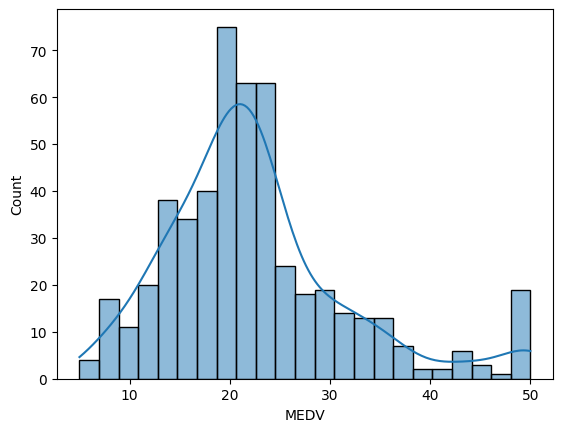

In [9]:
import seaborn as sns
sns.histplot(df['MEDV'],kde=True)

In [10]:
corr=df.corr()

In [11]:
corr.loc['MEDV'].sort_values(ascending=False)

MEDV       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: MEDV, dtype: float64

<Axes: >

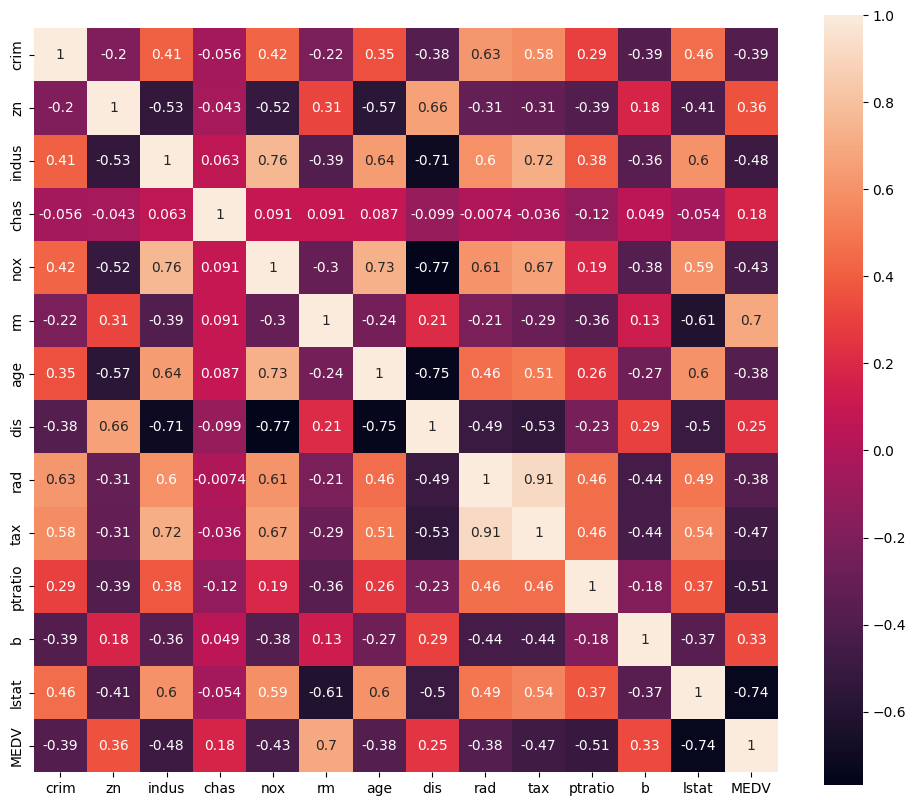

In [13]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(figsize=(12,10))
sns.heatmap(corr,square=True,annot=True)

In [14]:
x=df.loc[:,df.columns!='MEDV']
y=df.loc[:,df.columns=='MEDV']

In [15]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)

In [16]:
from sklearn.preprocessing import MinMaxScaler

mms=MinMaxScaler()

x_train=mms.fit_transform(x_train)
x_test=mms.fit_transform(x_test)

In [19]:
x_train.shape

(354, 13)

In [22]:
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()

model.add(Dense(128,input_shape=x_train[0].shape,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='linear'))

model.compile(optimizer='adam',loss='mse',metrics=['mae'])
model.summary()

C:\Users\rahul patil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history=model.fit(x_train,y_train,epochs=300,validation_split=0.05,verbose=1)

Epoch 1/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 593.3737 - mae: 22.6796 - val_loss: 453.3784 - val_mae: 18.5951
Epoch 2/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 509.9964 - mae: 20.9218 - val_loss: 402.1309 - val_mae: 17.0547
Epoch 3/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 497.9860 - mae: 20.1274 - val_loss: 328.8340 - val_mae: 14.7201
Epoch 4/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 398.3690 - mae: 17.2099 - val_loss: 238.2814 - val_mae: 11.9103
Epoch 5/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 261.1378 - mae: 13.1858 - val_loss: 169.6845 - val_mae: 10.4493
Epoch 6/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 168.6464 - mae: 10.1104 - val_loss: 171.0981 - val_mae: 10.7932
Epoch 7/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 132.0056 - mae: 9.0074 - val_loss: 177.0326 - val_mae: 10.9012
Epoch 8/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 106.6005 - mae: 7.7269 - val_loss: 141.7690 - val_mae: 9.6638
Epoch 9/300
11/11

In [25]:
mse_nn,mae_nn=model.evaluate(x_test,y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 16.9177 - mae: 3.2511


In [26]:
print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

Mean squared error on test data:  17.696619033813477
Mean absolute error on test data:  3.344376564025879


In [27]:
y_pred=model.predict(x_test)
y_pred[0]

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step


array([17.771221], dtype=float32)

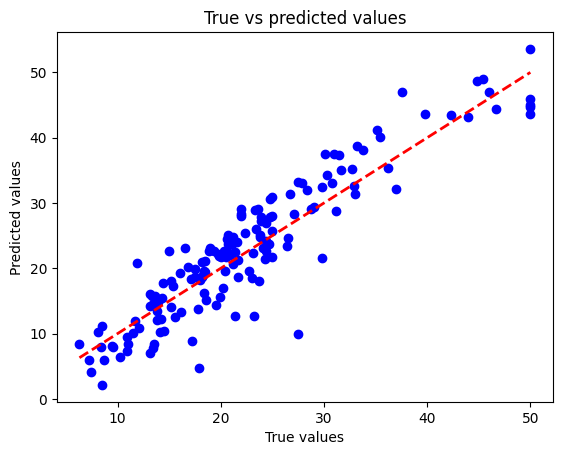

In [30]:
plt.scatter(y_test,y_pred,color='blue')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("True vs predicted values")
plt.show()